In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df[df.target==1].head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [7]:
df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [8]:
df0 = df[:50]
df1 = df[50:100]
df2 = df[100:]

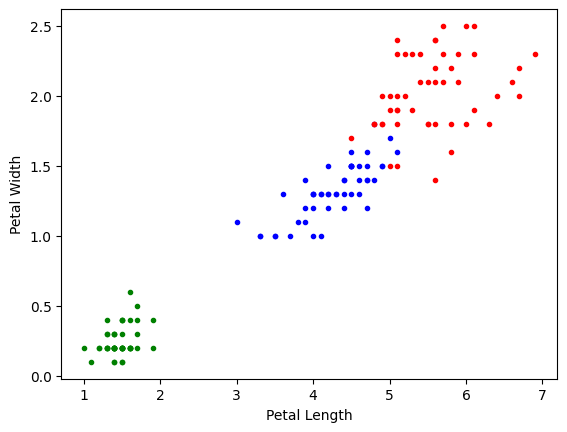

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'],color="green",marker='.')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'],color="blue",marker='.')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'],color="red",marker='.')

In [12]:
x = df.drop(['target','flower_name'],axis =1)
y = df.target

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [20]:
y_predicted  = knn.predict(x_test)

array([1, 0, 0, 2, 1, 2, 2, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 2, 1, 1, 1, 0, 0])

In [21]:
knn.score(x_test,y_test)

1.0

In [23]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[14,  0,  0],
       [ 0, 11,  0],
       [ 0,  0,  5]])

Text(58.222222222222214, 0.5, 'Truth')

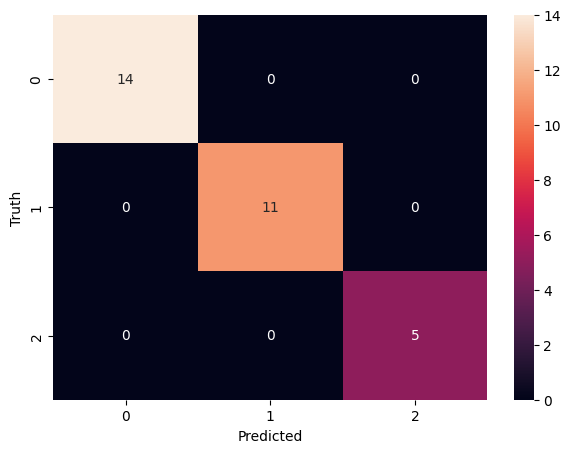

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [25]:
import pandas as pd
from sklearn.datasets import load_digits
digits = load_digits()

In [26]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [27]:
df = pd.DataFrame(digits.data,digits.target)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [28]:
df['target'] = digits.target

In [30]:
x = df.drop(['target'], axis=1)
y = df.target

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [33]:
knn.predict(x_test)

array([5, 6, 7, 6, 6, 5, 6, 5, 1, 5, 1, 5, 3, 2, 6, 0, 0, 7, 8, 1, 4, 5,
       2, 9, 0, 2, 9, 7, 8, 7, 8, 0, 6, 4, 9, 1, 1, 4, 3, 3, 7, 1, 0, 7,
       9, 2, 4, 4, 4, 6, 4, 8, 0, 4, 5, 7, 7, 9, 5, 8, 8, 6, 6, 4, 1, 5,
       2, 4, 1, 2, 7, 2, 0, 4, 2, 5, 6, 3, 9, 3, 3, 9, 1, 4, 9, 0, 5, 4,
       0, 0, 8, 3, 4, 0, 4, 6, 0, 8, 5, 7, 9, 1, 1, 6, 7, 0, 1, 3, 2, 9,
       2, 1, 1, 1, 8, 3, 5, 6, 4, 1, 9, 4, 9, 5, 8, 3, 7, 8, 1, 7, 4, 5,
       2, 6, 9, 9, 3, 7, 9, 1, 8, 6, 3, 5, 1, 7, 7, 2, 7, 9, 6, 8, 8, 1,
       5, 2, 5, 2, 1, 0, 7, 7, 1, 7, 9, 7, 5, 0, 0, 7, 6, 0, 8, 7, 6, 4,
       6, 5, 2, 1, 4, 1, 9, 5, 8, 1, 3, 0, 6, 9, 7, 6, 0, 2, 7, 5, 6, 2,
       1, 1, 4, 4, 1, 2, 8, 7, 2, 3, 0, 6, 7, 4, 9, 0, 1, 3, 1, 1, 9, 2,
       4, 8, 0, 4, 6, 6, 2, 2, 0, 4, 8, 4, 6, 7, 9, 6, 5, 6, 0, 9, 1, 6,
       3, 1, 5, 0, 5, 7, 3, 2, 9, 4, 2, 9, 3, 5, 2, 9, 2, 5, 8, 3, 0, 6,
       7, 2, 7, 2, 6, 6, 7, 2, 4, 9, 0, 0, 6, 6, 1, 8, 1, 6, 3, 6, 0, 1,
       9, 8, 8, 6, 3, 6, 1, 7, 2, 9, 1, 9, 2, 8, 7,

In [34]:
knn.score(x_test,y_test)

0.9777777777777777

In [36]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
cm

array([[32,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 39,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  0,  0, 32,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 33,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 41,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  3,  0,  1,  0,  0,  0,  0, 30,  0],
       [ 0,  1,  0,  0,  1,  0,  0,  0,  0, 37]])

Text(58.222222222222214, 0.5, 'Truth')

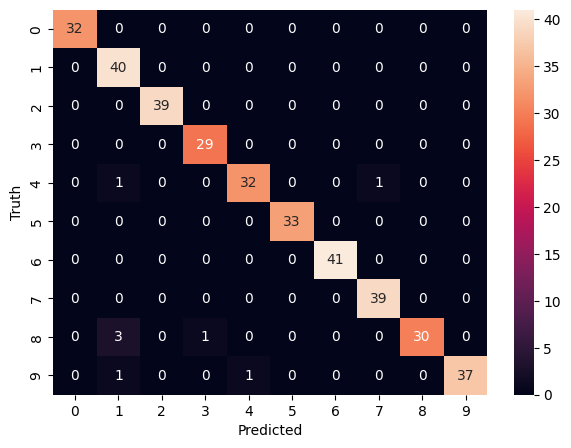

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(58.222222222222214, 0.5, 'Actual')

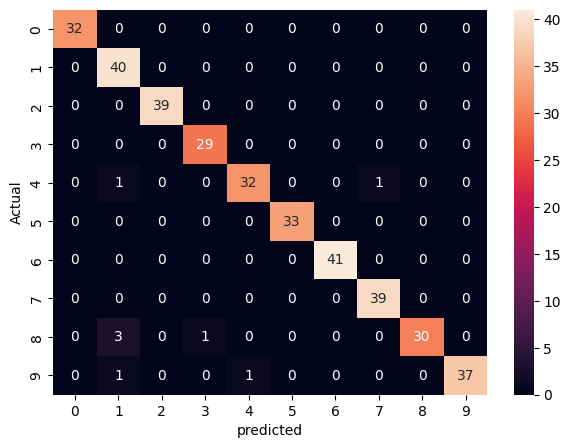

In [40]:
plt.figure(figsize = (7,5))
sn.heatmap(cm,annot= True)
plt.xlabel("predicted")
plt.ylabel('Actual')
